# 3.2 Iris Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# load data
iris_dataset = load_iris()

In [3]:
# check keys in dataset
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
# check the discription 
print('DESCR of iris_dataset:\n{}'.format(iris_dataset['DESCR']))

DESCR of iris_dataset:
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing At

In [5]:
print('Feature names of iris_dataset:\n{}'.format(iris_dataset['feature_names']))

Feature names of iris_dataset:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print('data of iris_dataset:\n{}'.format(iris_dataset['data'][:5]))
print('shape of iris_dataset:\n{}'.format(iris_dataset['data'].shape))

data of iris_dataset:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
shape of iris_dataset:
(150, 4)


In [7]:
print('target_names of iris_dataset:\n{}'.format(iris_dataset['target_names']))

target_names of iris_dataset:
['setosa' 'versicolor' 'virginica']


In [8]:
# 样本矩阵
iris = iris_dataset.data
# 类标签
target_names = iris_dataset.target_names

In [9]:
# 目标向量
target = iris_dataset.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# 计算均值向量
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(iris[target==cl], axis=0))
    print('Mean Vector of class %s: %s\n' %(cl, mean_vectors[cl]))

Mean Vector of class 0: [ 5.006  3.418  1.464  0.244]

Mean Vector of class 1: [ 5.936  2.77   4.26   1.326]

Mean Vector of class 2: [ 6.588  2.974  5.552  2.026]



In [11]:
# Computing the covariance matrices

# within-class covariance matrices
sigma_w = np.zeros((4,4))
for cl,mv in zip(range(0,3), mean_vectors):
    class_cov_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in iris[target == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1)  # make column vectors
        class_cov_mat += (row-mv).dot((row-mv).T)
    sigma_w += class_cov_mat                         # sum class scatter matrices
print('within-class covariance Matrix:\n', sigma_w)

within-class covariance Matrix:
 [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


In [41]:
# between-class covariance matrices
overall_mean = np.mean(iris, axis=0)
print('overall mean:\n',overall_mean)

sigma_b = np.zeros((4,4))
for mv in mean_vectors:  
    mv = mv.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    sigma_b +=  1/3 * (mv - overall_mean).dot((mv - overall_mean).T)

print('between-class Scatter Matrix:\n', sigma_b)

overall mean:
 [ 5.84333333  3.054       3.75866667  1.19866667]
between-class Scatter Matrix:
 [[ 0.42141422 -0.13022667  1.10109778  0.47575378]
 [-0.13022667  0.073184   -0.37370133 -0.14994933]
 [ 1.10109778 -0.37370133  2.91095822  1.24605422]
 [ 0.47575378 -0.14994933  1.24605422  0.53736089]]


### 1. Find the optimal direction

In [42]:
# calculate eigenvectors,eigenvalues for inverse of sigma_w dot sigma_b
eig_values, eig_vectors = np.linalg.eigh(np.linalg.inv(sigma_w).dot(sigma_b))

for i in range(len(eig_values)):
    eigvec_sc = eig_vectors[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_values[i].real))


Eigenvector 1: 
[[ 0.43122748]
 [ 0.08952333]
 [ 0.50890581]
 [-0.73962376]]
Eigenvalue 1: -8.67e-02

Eigenvector 2: 
[[ 0.77595698]
 [ 0.43033621]
 [-0.40027793]
 [ 0.22908315]]
Eigenvalue 2: -4.76e-02

Eigenvector 3: 
[[-0.38420452]
 [ 0.89010784]
 [ 0.24019528]
 [ 0.04900146]]
Eigenvalue 3: 2.41e-02

Eigenvector 4: 
[[ 0.25361489]
 [-0.12043398]
 [ 0.72325561]
 [ 0.63093301]]
Eigenvalue 4: 3.27e-01


In [43]:
for i in range(len(eig_values)):
    eigenvector = eig_vectors[:,i].reshape(4,1)
    eigenvalue = eig_values[i]
    left = (np.linalg.inv(sigma_w).dot(sigma_b)).dot(eigenvector)
    right = eigenvalue * eigenvector
    print('\n',left-right)


 [[  1.90209617e-02]
 [ -2.68951782e-02]
 [  9.31535889e-02]
 [ -5.55111512e-17]]

 [[  4.04358520e-02]
 [  2.81356808e-02]
 [ -2.88523956e-02]
 [  1.38777878e-17]]

 [[  9.27616446e-03]
 [ -2.05747387e-02]
 [ -6.17159934e-03]
 [  5.16080234e-17]]

 [[ -1.42006246e-01]
 [ -7.15220049e-02]
 [ -7.94642863e-02]
 [ -2.77555756e-17]]


In [44]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.327191967911
0.0867488177535
0.0475633100106
0.0241169909437


In [45]:
# express the “explained variance” as percentage
print('Variance explained:\n')
eigv_sum = sum(np.abs(eig_values))
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 67.38%
eigenvalue 2: 17.86%
eigenvalue 3: 9.79%
eigenvalue 4: 4.97%


In [47]:
W = eig_pairs[0][1].reshape(4,1)
print('The optimal w*:\n',W)

The optimal w*:
 [[ 0.25361489]
 [-0.12043398]
 [ 0.72325561]
 [ 0.63093301]]


### 2. Plot the histogram

In [48]:
iris_lda = iris.dot(W)
# print(iris_lda)

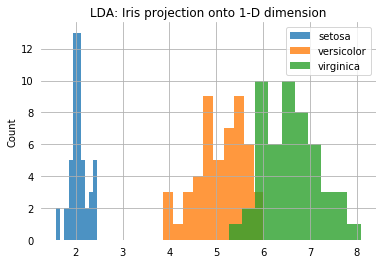

In [49]:
# plot the histogram
def plot_1d_iris():
    ax = plt.subplot(111)
    for label,color in zip(range(0,3), ('blue','red','green')):
#         print(iris_lda[target==cl])
        plt.hist(x=iris_lda[target==label],label=target_names[label],alpha=0.8)
        
    plt.ylabel('Count')
    
    legend = plt.legend(loc='upper right', fancybox=True)
    plt.title('LDA: Iris projection onto 1-D dimension')
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_1d_iris()

### 3. W = w* + a ?

In [50]:
a = eig_pairs[1][1].reshape(4,1)
W2 = W + a
print(W2)

[[ 0.68484237]
 [-0.03091065]
 [ 1.23216142]
 [-0.10869075]]


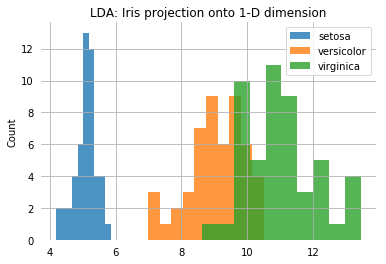

In [51]:
iris_lda2 = iris.dot(W2)
# plot the histogram
def plot_1d_iris2():
    ax = plt.subplot(111)
    for label,color in zip(range(0,3), ('blue','red','green')):
#         print(iris_lda[target==cl])
        plt.hist(x=iris_lda2[target==label],label=target_names[label],alpha=0.8)
        
    plt.ylabel('Count')
    
    legend = plt.legend(loc='upper right', fancybox=True)
    plt.title('LDA: Iris projection onto 1-D dimension')
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_1d_iris2()